# Project Title: [Uber Fare Prediction System](https://miktex.org/download)

In [84]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Exploration

In [85]:
#importing the dataset

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Machine Learning Nangi/uber.csv')
# df = pd.read_csv('/content/uber.csv')

Mounted at /content/drive


In [86]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [87]:
df.shape

(200000, 9)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [89]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


#### Drop unnecessary columns for prediction

In [90]:

df.drop(['Unnamed: 0', 'key'],axis=1,inplace=True)

In [91]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [92]:
df.dtypes

,0
fare_amount,float64
pickup_datetime,object
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [94]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


## Pre-process the dataset.

### Handling Missing Values

In [95]:
df.isnull().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [96]:
df.isnull().sum().sum()

np.int64(2)

#### Filling the missing values with the mean of the column

In [97]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(),inplace=True)

/tmp/ipython-input-1944339489.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)
/tmp/ipython-input-1944339489.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [98]:
df.isnull().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [99]:
df.dtypes

,0
fare_amount,float64
pickup_datetime,object
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


### Data Type Conversion

#### Convert pickup_datetime to datetime format

In [100]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce', utc=True)

In [101]:
df.dtypes

,0
fare_amount,float64
pickup_datetime,"datetime64[ns, UTC]"
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


In [102]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


### Feature Extraction from DateTime

In [103]:
# segregate hour, day, month, year, weekday, dayName from the pickup_datetime column
df = df.assign(hour=df.pickup_datetime.dt.hour,
               day=df.pickup_datetime.dt.day,
               month=df.pickup_datetime.dt.month,
               year=df.pickup_datetime.dt.year,
               weekday=df.pickup_datetime.dt.weekday,
               dayName=df.pickup_datetime.dt.day_name())

In [104]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday,dayName
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,Thursday
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,Friday
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,Monday
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,Friday
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,Thursday


#### Drop the pickup_datetime and dayName columns

In [105]:
df.drop(['pickup_datetime','dayName'],axis=1,inplace=True)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [106]:
df.dtypes

,0
fare_amount,float64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64
hour,int32
day,int32
month,int32
year,int32


#### Check the statistics of the data

In [107]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535,13.491335,15.704670,6.281795,2011.742440,3.048425
std,9.901776,11.437787,7.720539,13.117375,6.794812,1.385997,6.515531,8.687409,3.438925,1.856397,1.946946
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,23.000000,31.000000,12.000000,2015.000000,6.000000


In [108]:
x = df['fare_amount'].value_counts() # list series of unique values with their counts
print(type(x))
print('Max Occurance Value:',x.idxmax(),'Max Occurance Count:',x.max()) # idmax returns the maximum occurance value and max returns the maximum occurance count

<class 'pandas.core.series.Series'>
Max Occurance Value: 6.5 Max Occurance Count: 9684


In [109]:
x

,count
fare_amount,
6.50,9684
4.50,8247
8.50,7521
5.70,5858
5.30,5838
...,...
147.80,1
78.25,1
54.30,1


### Outlier Detection and Removal

In [110]:
number_of_columns = len(df.columns)
number_of_columns

11

<Axes: >

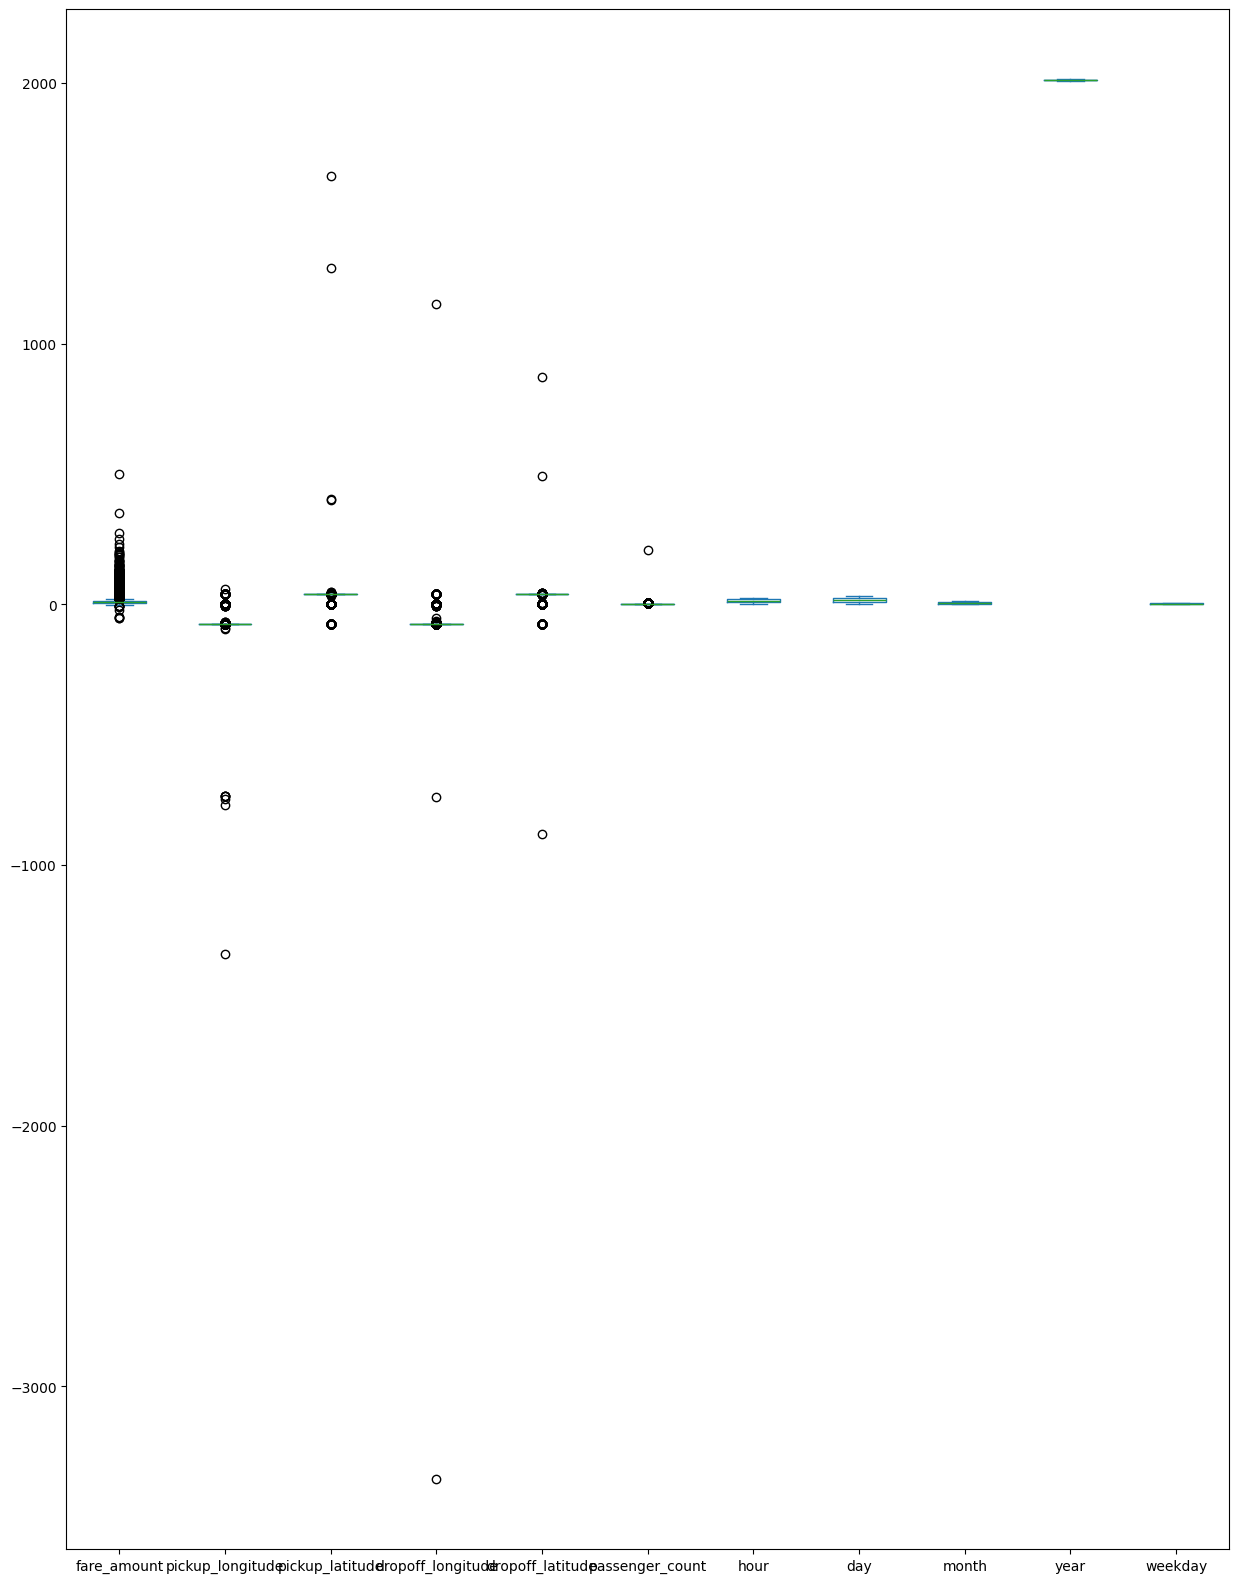

In [111]:
df.plot(kind='box',subplots=False,layout=(number_of_columns//2,2),figsize=(15,20))

,0
fare_amount,"Axes(0.125,0.786098;0.352273x0.0939024)"
pickup_longitude,"Axes(0.547727,0.786098;0.352273x0.0939024)"
pickup_latitude,"Axes(0.125,0.673415;0.352273x0.0939024)"
dropoff_longitude,"Axes(0.547727,0.673415;0.352273x0.0939024)"
dropoff_latitude,"Axes(0.125,0.560732;0.352273x0.0939024)"
passenger_count,"Axes(0.547727,0.560732;0.352273x0.0939024)"
hour,"Axes(0.125,0.448049;0.352273x0.0939024)"
day,"Axes(0.547727,0.448049;0.352273x0.0939024)"
month,"Axes(0.125,0.335366;0.352273x0.0939024)"
year,"Axes(0.547727,0.335366;0.352273x0.0939024)"


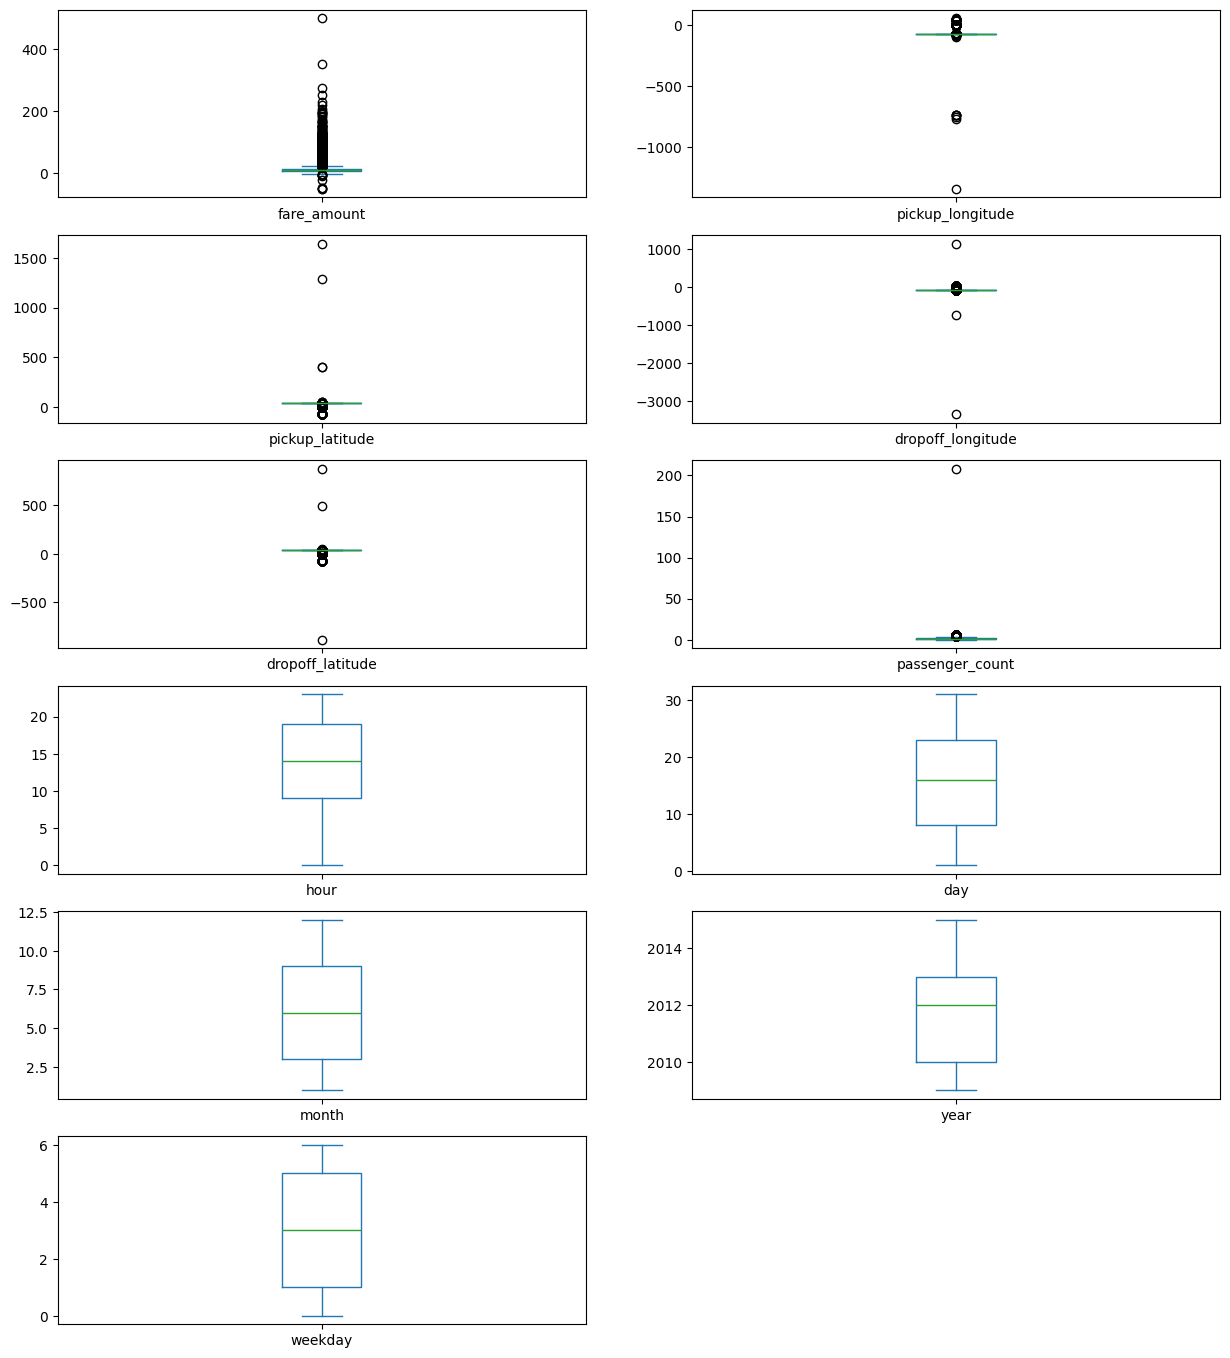

In [112]:
df.plot(kind='box',subplots=True,layout=(7,2),figsize=(15,20))

#### Eleminating the outliers

In [113]:
# Using the Interquartile Range (IQR) method
def remove_outlier(df1, col):
    Q1 = df1[col].quantile(0.25)
    Q2 = df1[col].quantile(0.50)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_wisker = Q1 - 1.5*IQR
    upper_wisker = Q3 + 1.5*IQR
    print("------************************************************************************************************------")
    print('col :',col,'Q1=',Q1,'Q2=',Q2,'Q3=',Q3,'IQR=',IQR)
    df1[col] = np.clip(df1[col],lower_wisker,upper_wisker)
    return df1

def treat_outliers_all(df1, col_list):
    print('col_list:',col_list)
    for col in col_list:
        df1 = remove_outlier(df1, col)
    return df1

In [114]:
df = treat_outliers_all(df, df.columns)

col_list: Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'weekday'],
      dtype='object')
------************************************************************************************************------
col : fare_amount Q1= 6.0 Q2= 8.5 Q3= 12.5 IQR= 6.5
------************************************************************************************************------
col : pickup_longitude Q1= -73.992065 Q2= -73.98182299999999 Q3= -73.96715350000001 IQR= 0.02491149999998754
------************************************************************************************************------
col : pickup_latitude Q1= 40.73479575 Q2= 40.752592 Q3= 40.767158 IQR= 0.03236224999999848
------************************************************************************************************------
col : dropoff_longitude Q1= -73.991407 Q2= -73.98009300000001 Q3= -73.963658 IQR= 0.02774900000000002

,0
fare_amount,"Axes(0.125,0.786098;0.352273x0.0939024)"
pickup_longitude,"Axes(0.547727,0.786098;0.352273x0.0939024)"
pickup_latitude,"Axes(0.125,0.673415;0.352273x0.0939024)"
dropoff_longitude,"Axes(0.547727,0.673415;0.352273x0.0939024)"
dropoff_latitude,"Axes(0.125,0.560732;0.352273x0.0939024)"
passenger_count,"Axes(0.547727,0.560732;0.352273x0.0939024)"
hour,"Axes(0.125,0.448049;0.352273x0.0939024)"
day,"Axes(0.547727,0.448049;0.352273x0.0939024)"
month,"Axes(0.125,0.335366;0.352273x0.0939024)"
year,"Axes(0.547727,0.335366;0.352273x0.0939024)"


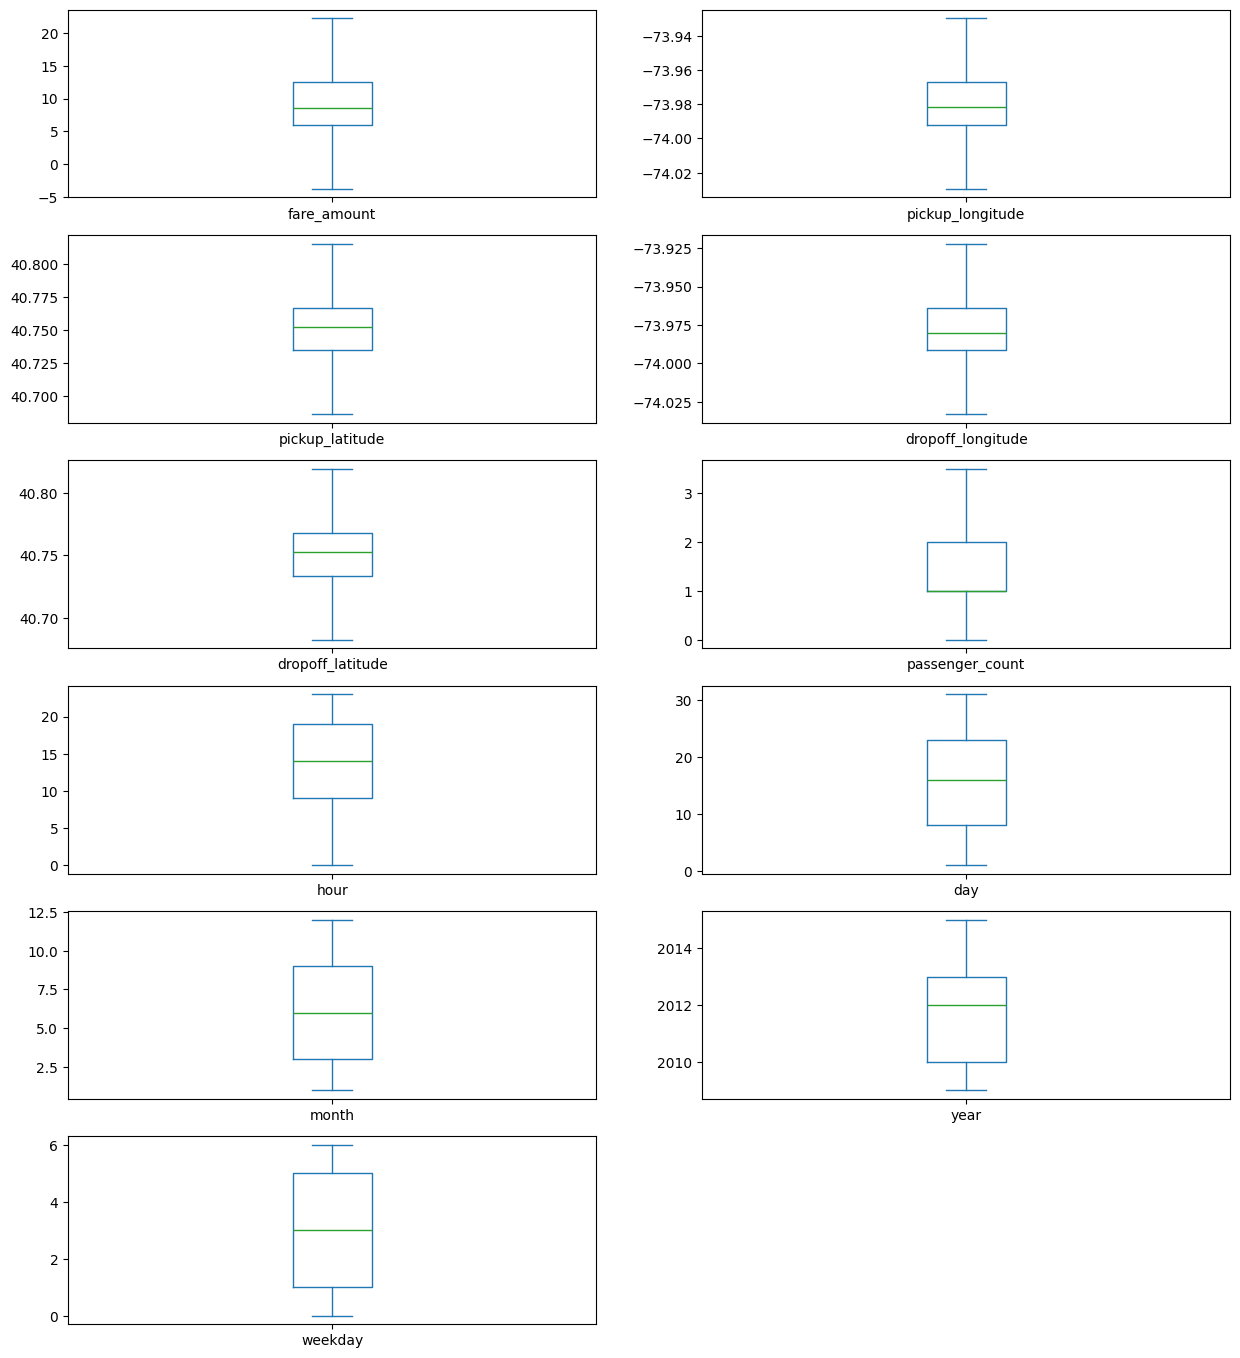

In [115]:
df.plot(kind='box',subplots=True,layout=(7,2),figsize=(15,20))

#### Finding incorrect latitude(less than -90 or greater than 90) and longitude(greater than 180 or less than -180) values, if exits remove them

In [116]:
incorrect_coordinates = df.loc[(df['pickup_latitude'] < -90) | (df['pickup_latitude'] > 90) |
                               (df['pickup_longitude'] < -180) | (df['pickup_longitude'] > 180) |
                               (df['dropoff_latitude'] < -90) | (df['dropoff_latitude'] > 90) |
                               (df['dropoff_longitude'] < -180) | (df['dropoff_longitude'] > 180)]

incorrect_coordinates

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday


In [117]:
df.drop(incorrect_coordinates, inplace=True, errors='ignore')
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4
4,16.00,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,10,28,10,2012,6
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,1,14,3,2014,4
199997,22.25,-73.986017,40.756487,-73.922034,40.692588,2.0,0,29,6,2009,0
199998,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0,14,20,5,2015,2


#### Calculate the distance between two points on the earch using haversine library

In [118]:
!pip install haversine
import haversine as hs
travel_distance = []
for pos in range(len(df['pickup_longitude'])):
    long1,lati1,long2,lati2 = [df['pickup_longitude'][pos],df['pickup_latitude'][pos],df['dropoff_longitude'][pos],df['dropoff_latitude'][pos]]
    loc1 = (lati1,long1) # location 1
    loc2 = (lati2,long2) # location 2
    c = hs.haversine(loc1,loc2) # distance between two locations
    travel_distance.append(c)

df['dist_travel_km'] = travel_distance

In [119]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088


#### Add condition that Uber does not travel over 130 kms in a single trip, minimum distance is 1 km and maximum distance is 130 km

In [120]:
df = df[(df.dist_travel_km > 1) & (df.dist_travel_km < 130)]
print('Reaming data set after removing the outliers:',df.shape)

Reaming data set after removing the outliers: (163040, 12)


#### Check for missing vakues

In [121]:
bool_df = df.isnull()
bool_df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday,dist_travel_km
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
199994,False,False,False,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False,False,False,False


#### Heatmap for checking missing values

<Axes: >

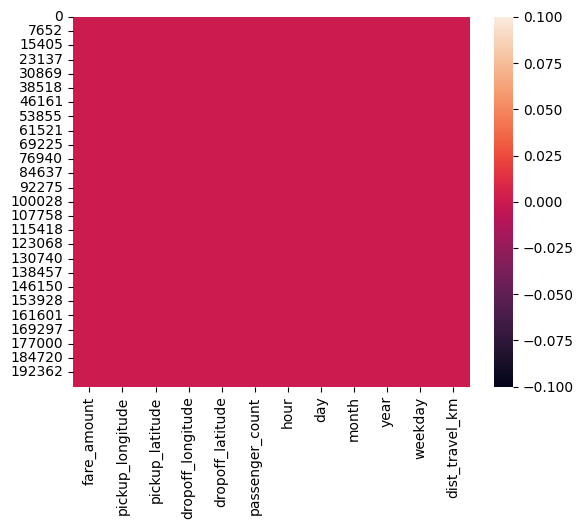

In [122]:
sns.heatmap(bool_df)

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

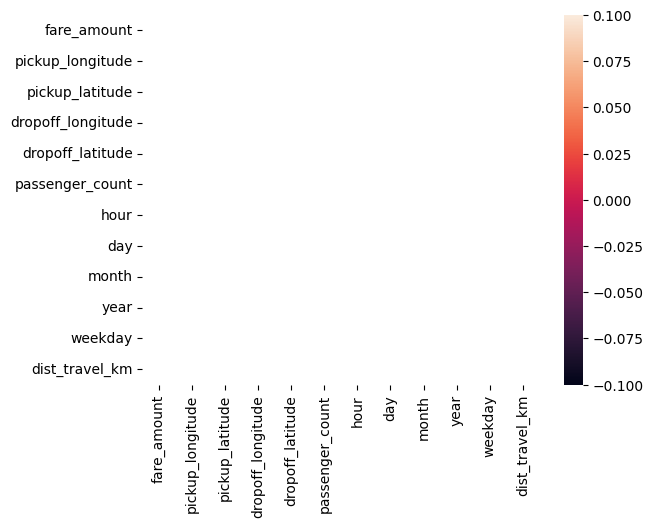

In [123]:
sns.heatmap(bool_df.corr()) # white color is highly correlated and black color is not correlated

#### Correlation matrix of the dataset

In [124]:
corr = df.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday,dist_travel_km
fare_amount,1.000000,0.193177,-0.119469,0.258616,-0.137745,0.015056,-0.029760,0.001607,0.031339,0.161861,0.009264,0.798927
pickup_longitude,0.193177,1.000000,0.425309,0.241587,0.169203,-0.012892,0.013057,-0.004459,0.000863,0.014862,-0.028392,0.130003
pickup_latitude,-0.119469,0.425309,1.000000,0.148775,0.358836,-0.016186,0.031484,0.002907,0.001627,-0.016172,-0.044618,-0.143530
dropoff_longitude,0.258616,0.241587,0.148775,1.000000,0.401698,-0.008670,-0.059730,-0.005912,0.002404,0.015657,-0.002164,0.247271
dropoff_latitude,-0.137745,0.169203,0.358836,0.401698,1.000000,-0.007419,0.019775,-0.000130,-0.001663,-0.010472,-0.031153,-0.111577
passenger_count,0.015056,-0.012892,-0.016186,-0.008670,-0.007419,1.000000,0.020203,0.002730,0.009936,-0.007765,0.047728,0.007754
hour,-0.029760,0.013057,0.031484,-0.059730,0.019775,0.020203,1.000000,0.005447,-0.002887,0.002574,-0.090975,-0.047252
day,0.001607,-0.004459,0.002907,-0.005912,-0.000130,0.002730,0.005447,1.000000,-0.017113,-0.011725,0.005673,0.001019
month,0.031339,0.000863,0.001627,0.002404,-0.001663,0.009936,-0.002887,-0.017113,1.000000,-0.113429,-0.010483,0.008433
year,0.161861,0.014862,-0.016172,0.015657,-0.010472,-0.007765,0.002574,-0.011725,-0.113429,1.000000,0.006522,0.020138


#### Heatmap with correlation values

<Axes: >

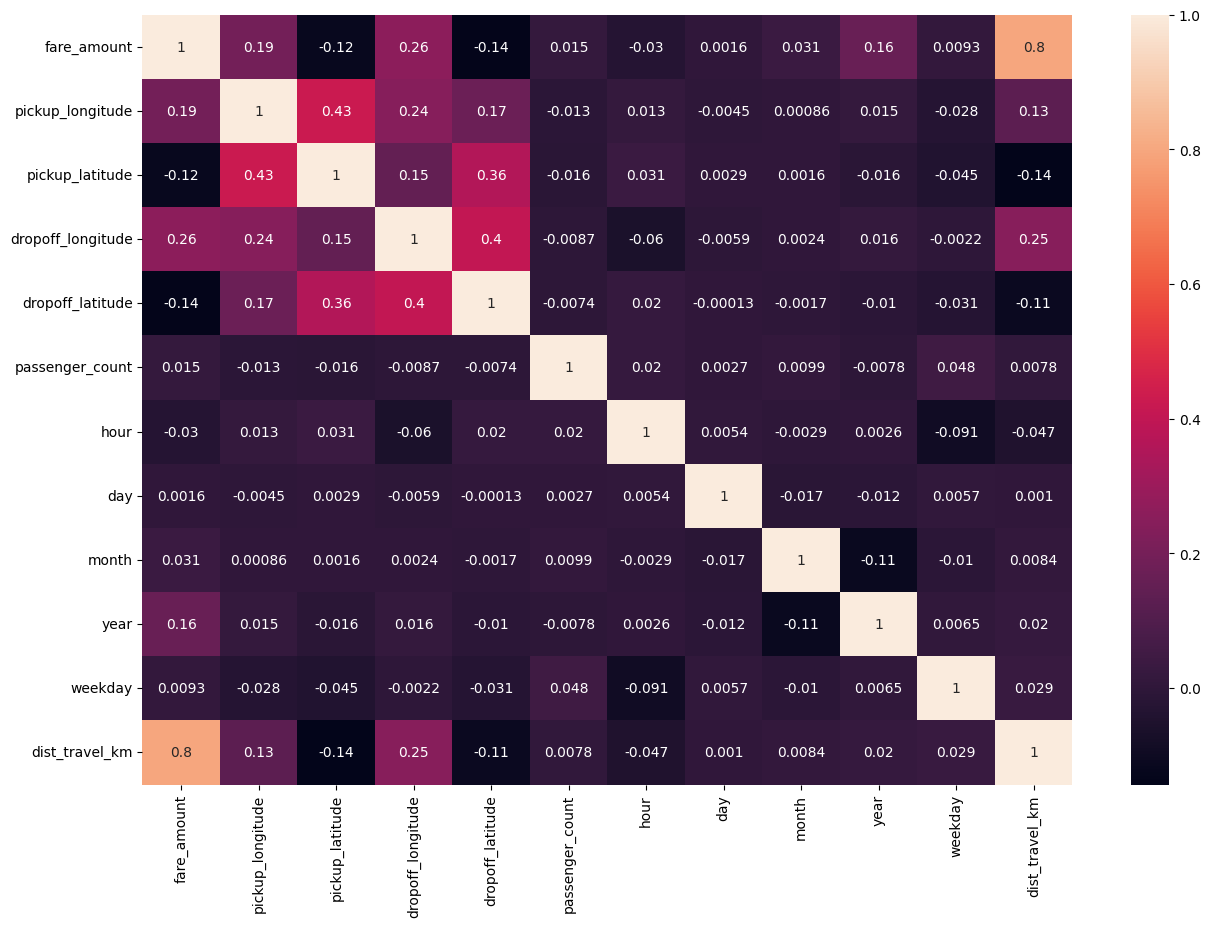

In [125]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

### Diving the dataset into feature and target values

In [126]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'weekday', 'dist_travel_km'],
      dtype='object')

In [127]:
x = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month', 'year', 'weekday', 'dist_travel_km']]
# or
# x = df[df.columns[1:]]

In [128]:
y = df['fare_amount']
y

,fare_amount
0,7.50
1,7.70
2,12.90
3,5.30
4,16.00
...,...
199994,12.00
199996,7.50
199997,22.25
199998,14.50


### Dividing the dataset into training and testing dataset

In [129]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7) # 80% training and 20% testing random_state=7 is used to get the same split every time

In [130]:
x_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday,dist_travel_km
181777,-73.987058,40.739422,-73.951012,40.782667,1.0,14,17,4,2013,2,5.686805
57255,-73.991088,40.760195,-74.003362,40.740137,2.0,19,11,3,2011,4,2.458348
41451,-73.993400,40.749900,-73.972720,40.782450,2.0,10,14,12,2014,6,4.016622
173008,-73.945992,40.773332,-73.990515,40.736572,3.5,14,10,6,2010,3,5.547262
83131,-74.003949,40.713247,-73.996771,40.731346,1.0,15,23,9,2009,2,2.101464
...,...,...,...,...,...,...,...,...,...,...,...
81555,-73.983937,40.773500,-73.996047,40.750557,3.5,18,21,9,2013,5,2.747475
65586,-73.929786,40.773702,-73.922034,40.692712,3.5,19,20,9,2011,1,9.029344
13187,-73.971954,40.782089,-73.957771,40.774437,3.5,1,19,4,2015,6,1.466364
60932,-73.968068,40.799880,-73.984100,40.749037,3.5,14,18,12,2010,5,5.812440


In [131]:
x_test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday,dist_travel_km
4601,-73.980368,40.745082,-73.965373,40.756930,3.5,23,16,5,2011,0,1.825137
16992,-73.971989,40.750650,-73.922034,40.722312,2.0,0,14,2,2011,0,5.257748
22135,-73.988637,40.737163,-73.990168,40.748987,2.0,12,6,12,2011,1,1.321082
143093,-73.979542,40.781737,-73.982103,40.752105,2.0,9,25,8,2010,2,3.301984
42087,-74.000102,40.761207,-73.991612,40.751532,1.0,7,23,12,2010,3,1.291802
...,...,...,...,...,...,...,...,...,...,...,...
183681,-73.982342,40.771372,-73.979237,40.755717,1.0,5,15,12,2011,3,1.760292
50121,-73.976142,40.760242,-73.993116,40.758610,3.0,15,24,8,2013,5,1.441116
166652,-73.998783,40.734627,-73.996472,40.744519,1.0,17,11,6,2010,4,1.117041
41458,-73.986640,40.755662,-73.944687,40.796607,1.0,11,30,6,2012,5,5.762655


In [132]:
y_train

,fare_amount
181777,17.0
57255,11.7
41451,10.5
173008,13.3
83131,7.7
...,...
81555,8.5
65586,19.7
13187,5.5
60932,17.3


In [133]:
y_test

,fare_amount
4601,6.50
16992,22.25
22135,7.30
143093,12.10
42087,5.30
...,...
183681,6.10
50121,7.00
166652,4.50
41458,13.30


In [134]:
len(y)

163040

In [135]:
len(y_train)

130432

In [136]:
len(y_test)

32608

In [137]:
len(y_train) + len(y_test)

163040

## Linear Regression Model

#### Model creation

In [138]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

#### Model training

In [139]:
regression.fit(x_train, y_train)
LinearRegression()

LinearRegression()

In [140]:
regression.intercept_ # intercept value of the regression line

np.float64(3900.429217018181)

In [141]:
regression.coef_ # coefficients of the regression line

array([ 2.78251687e+01, -7.42712880e+00,  2.22718250e+01, -1.81334191e+01,
        7.10932525e-02,  9.16568640e-03,  2.97114455e-03,  6.43292725e-02,
        4.23413778e-01, -3.88123848e-02,  1.80086541e+00])

In [142]:
for i in range(0, len(regression.coef_)):
    print("theta:", i,':',regression.coef_[i])

theta: 0 : 27.825168659100072
theta: 1 : -7.427128801196267
theta: 2 : 22.271824955385227
theta: 3 : -18.133419120479083
theta: 4 : 0.0710932524829343
theta: 5 : 0.009165686396583883
theta: 6 : 0.0029711445500085754
theta: 7 : 0.06432927251853875
theta: 8 : 0.4234137783152052
theta: 9 : -0.038812384811438005
theta: 10 : 1.8008654062956113


#### Model Testing

In [143]:
y_pred = regression.predict(x_test) # predicting the fare_amount for the test data

In [144]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison

,Actual,Predicted
4601,6.50,8.488450
16992,22.25,15.938502
22135,7.30,7.175567
143093,12.10,10.097411
42087,5.30,5.979482
...,...,...
183681,6.10,7.822886
50121,7.00,7.914173
166652,4.50,5.549021
41458,13.30,15.115082


In [145]:
comparison.reset_index()

,index,Actual,Predicted
0,4601,6.50,8.488450
1,16992,22.25,15.938502
2,22135,7.30,7.175567
3,143093,12.10,10.097411
4,42087,5.30,5.979482
...,...,...,...
32603,183681,6.10,7.822886
32604,50121,7.00,7.914173
32605,166652,4.50,5.549021
32606,41458,13.30,15.115082


In [146]:
comparison.reset_index().drop('index',axis=1)

,Actual,Predicted
0,6.50,8.488450
1,22.25,15.938502
2,7.30,7.175567
3,12.10,10.097411
4,5.30,5.979482
...,...,...
32603,6.10,7.822886
32604,7.00,7.914173
32605,4.50,5.549021
32606,13.30,15.115082


<Axes: >

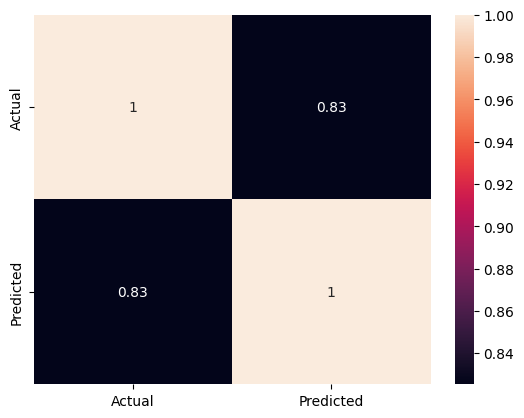

In [147]:
sns.heatmap(comparison.corr(),annot=True)

### Metrics Evaluation using R2, Mean Squared Error, Root Mean Squared Error

In [148]:
from sklearn.metrics import r2_score, mean_squared_error

# Make predictions on the training data
y_train_pred = regression.predict(x_train)
y_test_pred = regression.predict(x_test)

In [149]:
train_r2_score = r2_score(y_train, y_train_pred)
test_r2_score = r2_score(y_test, y_test_pred)
print(f'Train R-squared score: {train_r2_score:.4f}')
print(f'Test R-squared score: {test_r2_score:.4f}')

Train R-squared score: 0.6806
Test R-squared score: 0.6811


In [150]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Train Mean Squared Error: {train_mse}')
print(f'Test Mean Squared Error: {test_mse}')

Train Mean Squared Error: 9.102451668527502
Test Mean Squared Error: 9.101425952835783


In [151]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print(f'Train Root Mean Squared Error: {train_rmse}')
print(f'Test Root Mean Squared Error: {test_rmse}')

Train Root Mean Squared Error: 3.0170269585350913
Test Root Mean Squared Error: 3.016856965922611


## Random Forest Regression

#### Model Creation

In [152]:
from sklearn.ensemble import RandomForestRegressor

In [153]:
rf = RandomForestRegressor(n_estimators=100, random_state=42) # random_state=42 is used to get the same split every time

#### Model Training

In [154]:
rf.fit(x_train, y_train)
RandomForestRegressor()

RandomForestRegressor()

#### Model Testing

In [155]:
y_pred_rf = rf.predict(x_test)

In [156]:
y_pred_rf

array([ 6.44  , 21.3445,  7.74  , ...,  5.386 , 13.448 ,  8.069 ])

In [157]:
comparison_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
comparison_rf

,Actual,Predicted
4601,6.50,6.4400
16992,22.25,21.3445
22135,7.30,7.7400
143093,12.10,11.1080
42087,5.30,5.9160
...,...,...
183681,6.10,6.4430
50121,7.00,7.1250
166652,4.50,5.3860
41458,13.30,13.4480


In [158]:
comparison_rf.reset_index().drop('index',axis=1)

,Actual,Predicted
0,6.50,6.4400
1,22.25,21.3445
2,7.30,7.7400
3,12.10,11.1080
4,5.30,5.9160
...,...,...
32603,6.10,6.4430
32604,7.00,7.1250
32605,4.50,5.3860
32606,13.30,13.4480


<Axes: >

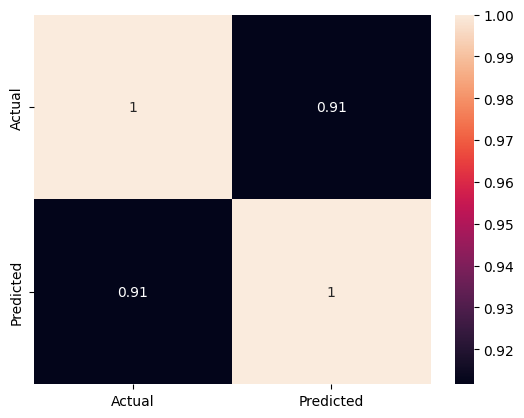

In [159]:
sns.heatmap(comparison_rf.corr(),annot=True)

### Metrics Evaluation using R2, Mean Squared Error, Root Mean Squared Error

In [160]:
y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)

In [161]:
train_r2_score_rf = r2_score(y_train, y_train_pred_rf)
test_r2_score_rf = r2_score(y_test, y_test_pred_rf)
print(f'Train R-squared score: {train_r2_score_rf:.4f}')
print(f'Test R-squared score: {test_r2_score_rf:.4f}')

Train R-squared score: 0.9762
Test R-squared score: 0.8308


In [162]:
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
print(f'Train Mean Squared Error: {train_mse_rf}')
print(f'Test Mean Squared Error: {test_mse_rf}')

Train Mean Squared Error: 0.6786827794035206
Test Mean Squared Error: 4.827308706547167


In [163]:
train_rmse_rf = np.sqrt(train_mse_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
print(f'Train Root Mean Squared Error: {train_rmse_rf}')
print(f'Test Root Mean Squared Error: {test_rmse_rf}')

Train Root Mean Squared Error: 0.8238220556670722
Test Root Mean Squared Error: 2.1971137218057617
